<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/3D_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:
!pip install rioxarray --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(1281, 2042)
(1623570, 13)
(1623570,)
[[ 1.36961899  0.24736996 -0.1476528  ... -0.16069615 -0.02251023
   0.00181547]
 [ 1.35855847  0.34044898 -0.0886942  ...  0.04449582 -0.01940699
  -0.00299578]
 [ 1.49716513  0.06596598 -0.22235646 ... -0.01596399 -0.0410641
  -0.00709674]
 ...
 [ 1.3887517   0.10657333  0.24551499 ...  0.01704833  0.0305855
  -0.01897671]
 [ 1.57255019  0.64424322 -0.25952052 ...  0.00642641  0.03571678
  -0.09723796]
 [ 1.52776052  0.52910694 -0.00551932 ... -0.06338594 -0.16262663
   0.0991215 ]]


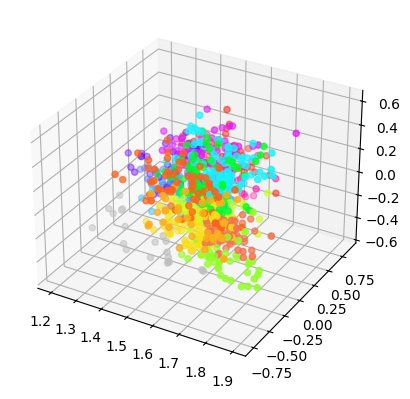

In [4]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)

isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
pcaf = '/content/drive/My Drive/Colab Notebooks/Analogs/PCA_Test'

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(os.path.join(pcaf, 'MultidimRasterLyr_d_pc.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr

print(X.shape)
print(cluster_labels.shape)

rng = np.random.default_rng(seed=123)
rnd_idxs = rng.choice(list(range(X.shape[0])), size=1000)
X_sample = X[rnd_idxs]
cluster_label_sample = cluster_labels[rnd_idxs]

print(X_sample)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca1, pca2, pca3, c=cluster_label_sample, cmap=custom_grad)

plt.show()


In [8]:
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)

isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
pcaf = '/content/drive/My Drive/Colab Notebooks/Analogs/PCA_Test'

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(os.path.join(pcaf, 'MultidimRasterLyr_d_pc.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr

print(X.shape)
print(cluster_labels.shape)

rng = np.random.default_rng(seed=123)
rnd_idxs = rng.choice(list(range(X.shape[0])), size=10000)
X_sample = X[rnd_idxs]
cluster_label_sample = cluster_labels[rnd_idxs]

print(X_sample)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=pca1, y=pca2, z=pca3, mode='markers',
  marker=dict(size=6, color=cluster_label_sample, colorscale=colors, symbol='circle'),
  name='blue'))

fig.show()

fig.write_html('/content/drive/My Drive/Colab Notebooks/Analogs/interactive_plot.html')


(1281, 2042)
(1623570, 13)
(1623570,)
[[ 1.36961899e+00  2.47369958e-01 -1.47652799e-01 ... -1.60696149e-01
  -2.25102262e-02  1.81546577e-03]
 [ 1.35855847e+00  3.40448980e-01 -8.86942045e-02 ...  4.44958202e-02
  -1.94069950e-02 -2.99578286e-03]
 [ 1.49716513e+00  6.59659779e-02 -2.22356461e-01 ... -1.59639874e-02
  -4.10640956e-02 -7.09673827e-03]
 ...
 [ 1.49104597e+00  4.30075102e-01 -3.62837542e-02 ... -7.18124424e-02
  -1.20140604e-01  5.40635252e-02]
 [ 1.59407940e+00 -1.39005333e-02 -2.03928695e-01 ...  1.11118346e-03
  -3.36232889e-02 -6.14630480e-02]
 [ 1.46114595e+00  1.76228528e-01 -1.78586838e-01 ...  1.01931490e-02
  -5.45256016e-03 -5.57800819e-02]]
